# Projeto 2 - Ciência dos dados
<hr style="border:1px solid black"> </hr>

## Informação sobre a base de dados
<hr style="border:0.5px solid black"> </hr>

O dataset será usado para predizer se um viajante possui ou não a tendência de adquirir um seguro viagem, com base nos parâmetros a seguir:

<ul>
<li><p>Idade $\Longrightarrow$ Quantitativa discreta</p></li>
<p>   </p>
<li>Setor de emprego $\Longrightarrow$ Qualitativa nominal (Privative Sector ou Government Sector)</li>
<p>   </p>
<li>Graduado $\Longrightarrow$ Qualitativa nominal (1, se o viajante possui uma graduação e 0, caso contrário)</li>
<p>   </p>
<li>Tamanho familia $\Longrightarrow$ Quantitativa discreta</li>
<p>   </p>
<li>Renda anual $\Longrightarrow$ Quantitativa contínua</li>
<p>   </p>
<li>Doencas cronicas $\Longrightarrow$ Qualitativa nominal (1, se o viajante possui alguma doença crônica e 0, caso contrário)</li>
<p>   </p>
<li>Voos frequentes $\Longrightarrow$ Qualitativa nominal  (1, se o viajante costuma viajar com frequência e 0, caso contrário</li>
<p>   </p>
<li>Viajou para exterior $\Longrightarrow$ Qualitativa nominal (1, se o viajante já viajou para o exterior e 0, caso contrário)</li>
<p>   </p>
<li>Seguro Viagem $\Longrightarrow$ Qualitativa nominal (1, se o viajante adquiriu o seguro viajem e 0, caso contrário)</li> 
</ul>

In [4]:
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import tree

%matplotlib inline

### Diretório e Base de dados
<hr style="border:0.5px solid black"> </hr>

In [11]:
# Importando biblioteca para Sistema Operacional


import os
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
C:\Users\Pedro Paulo\Downloads\C_Dados-Projeto_2



In [12]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'apagar.ipynb',
 'arvore.jpeg',
 'dataframes_2.png',
 'dataframes_video.png',
 'data_set_video.png',
 'decision.png',
 'exemplo.png',
 'floresta.jpeg',
 'Graficos_Aleatórios_Variaveis.ipynb',
 'ordem.png',
 'Projeto2_capa.png',
 'Seguro de Viagens2.ipynb',
 'TravelInsurancePrediction.xlsx',
 'Untitled.ipynb']

In [13]:
filename = 'TravelInsurancePrediction.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo TravelInsurancePrediction.xlsx está na mesma pasta do notebook, yay!


In [14]:
dados = pd.read_excel('TravelInsurancePrediction.xlsx')
dados.head()
# Se esse comando não funcionar, pode ser que você não tenha instalado a 
# biblioteca 'xlrd', leia a mensagem de erro até o fim.

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### Limpeza e organização dos dados
<hr style="border:0.5px solid black"> </hr>

In [15]:
dados=dados.drop(columns=['Unnamed: 0'])
dados  

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [16]:
dados=dados.rename(columns={'Age':'Idade'})
dados=dados.rename(columns={'Employment Type':'Setor de emprego'})
dados=dados.rename(columns={'GraduateOrNot':'Graduado'})
dados=dados.rename(columns={'AnnualIncome':'Renda anual'})
dados=dados.rename(columns={'FamilyMembers':'Tamanho familia'})
dados=dados.rename(columns={'ChronicDiseases':'Doencas cronicas'})
dados=dados.rename(columns={'FrequentFlyer':'Voos frequentes'})
dados=dados.rename(columns={'EverTravelledAbroad':'Viajou para exterior'})
dados=dados.rename(columns={'TravelInsurance':'Seguro Viagem'})
dados

,Idade,Setor de emprego,Graduado,Renda anual,Tamanho familia,Doencas cronicas,Voos frequentes,Viajou para exterior,Seguro Viagem
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [17]:
dados.dtypes

Idade                    int64
Setor de emprego        object
Graduado                object
Renda anual              int64
Tamanho familia          int64
Doencas cronicas         int64
Voos frequentes         object
Viajou para exterior    object
Seguro Viagem            int64
dtype: object

In [18]:
dados.Graduado = dados['Graduado'].replace({'Yes': 1, 'No': 0})
dados['Viajou para exterior'] = dados['Viajou para exterior'].replace({'Yes': 1, 'No': 0})
dados['Voos frequentes'] = dados['Voos frequentes'].replace({'Yes': 1, 'No': 0})
dados.head()

,Idade,Setor de emprego,Graduado,Renda anual,Tamanho familia,Doencas cronicas,Voos frequentes,Viajou para exterior,Seguro Viagem
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


## Análise Exploratória - O Target neste projeto será o Seguro Viagem
<hr style="border:0.5px solid black"> </hr>

In [20]:
dados.loc[dados['Seguro Viagem'] == 1].Idade.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,710.0,29.888732,3.331732,25.0,27.0,30.0,33.0,35.0


In [21]:
dados.loc[dados['Seguro Viagem'] == 0].Idade.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,1277.0,29.517619,2.644396,25.0,28.0,29.0,31.0,35.0


In [22]:
maximo=max(dados['Idade'])
minimo=min(dados['Idade'])
maximo,minimo

(35, 25)

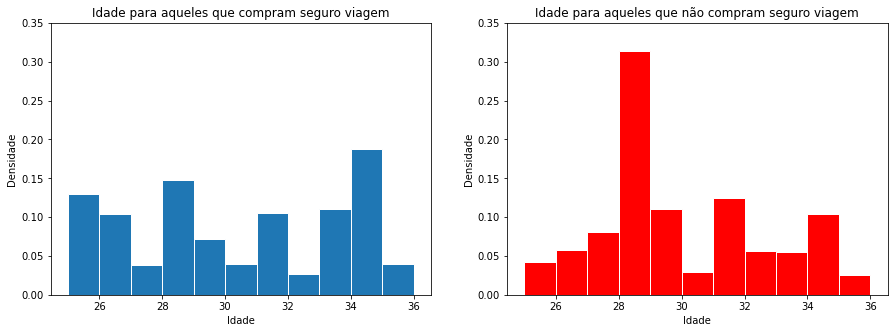

In [23]:
faixa= range(25,37,1)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(dados.loc[dados['Seguro Viagem'] == 1].Idade,density=True,bins=faixa, edgecolor='white')
plt.ylim(0,0.35)
plt.title('Idade para aqueles que compram seguro viagem')
plt.ylabel('Densidade')
plt.xlabel('Idade')

plt.subplot(122)
plt.hist(dados.loc[dados['Seguro Viagem'] == 0].Idade,density=True,bins=faixa, edgecolor='white', color='r')
plt.ylim(0,0.35)
plt.title('Idade para aqueles que não compram seguro viagem')
plt.ylabel('Densidade')
plt.xlabel('Idade')

plt.show()

#### Conclusão:
<li>Podemos observar pelos gráficos que não há uma relação tão acentuada quando se compara a idade pela quantidade de viajantes que compram ou não o seguro viagem.</li>


### Setor de emprego


In [24]:
setor_x_seguro=pd.crosstab(dados['Setor de emprego'], dados['Seguro Viagem'], margins=True, normalize=True)
round(setor_x_seguro,2).transpose()

Setor de emprego,Government Sector,Private Sector/Self Employed,All
Seguro Viagem,,,
0,0.22,0.43,0.64
1,0.07,0.29,0.36
All,0.29,0.71,1.00


<AxesSubplot:title={'center':'Não compradores vs setor de emprego'}, xlabel='Setor de emprego', ylabel='count'>

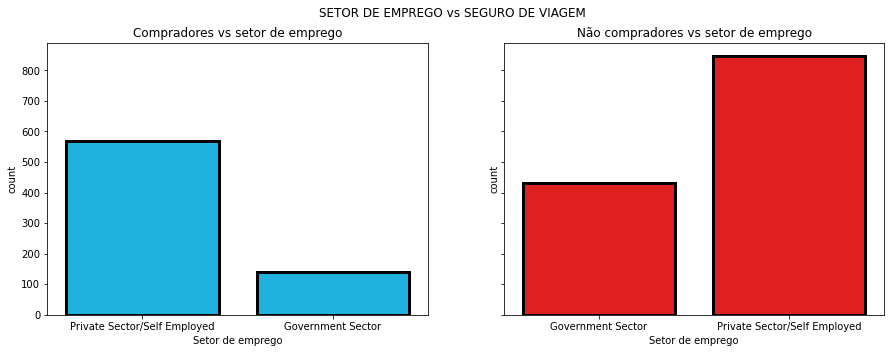

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].set_title('Compradores vs setor de emprego')
axes[1].set_title('Não compradores vs setor de emprego')
fig.suptitle('SETOR DE EMPREGO vs SEGURO DE VIAGEM')
sb.countplot(ax=axes[0] ,data = dados.loc[dados['Seguro Viagem'] == 1], x="Setor de emprego", palette=["#00C3FF","#00C3FF"], edgecolor="black", lw=3)
sb.countplot(ax=axes[1] ,data = dados.loc[dados['Seguro Viagem'] == 0], x="Setor de emprego", palette=["#FF0000","#FF0000"], edgecolor="black", lw=3)

#### Conclusão:

<li>Podemos concluir que as pessoas que trabalham no setor privado tendem a comprar mais o seguro viagem do que quando comparado as que trabalham para o governo.</li>

### Graduação


In [29]:
graduado_x_seguro=pd.crosstab(dados['Graduado'], dados['Seguro Viagem'], margins=True, normalize=True)
round(graduado_x_seguro,2)

Seguro Viagem,0,1,All
Graduado,,,
0,0.10,0.05,0.15
1,0.54,0.31,0.85
All,0.64,0.36,1.00


<AxesSubplot:title={'center':'Não compradores vs Graduação'}, xlabel='Graduado', ylabel='count'>

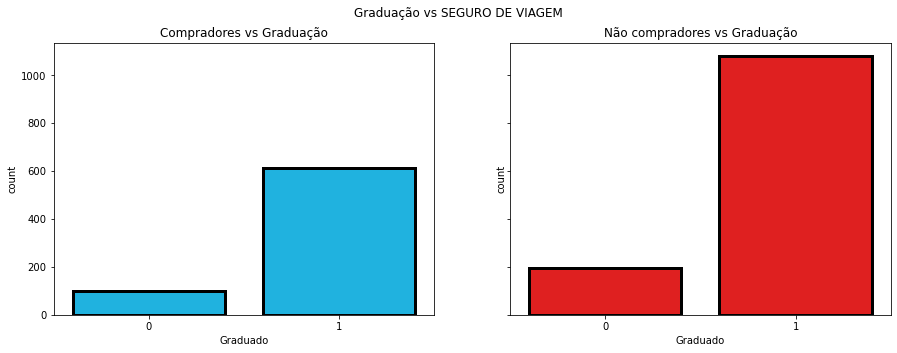

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].set_title('Compradores vs Graduação')
axes[1].set_title('Não compradores vs Graduação')
fig.suptitle('Graduação vs SEGURO DE VIAGEM')
sb.countplot(ax=axes[0] , data = dados.loc[dados['Seguro Viagem'] == 1], x="Graduado", palette=["#00C3FF","#00C3FF"], edgecolor="black", lw=3)
sb.countplot(ax=axes[1] ,data = dados.loc[dados['Seguro Viagem'] == 0], x="Graduado", palette=["#FF0000","#FF0000"], edgecolor="black", lw=3)

#### Conclusão:

<li>aaa</li>

### Renda Anual


In [33]:
dados.loc[dados['Seguro Viagem'] == 1]['Renda anual'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Renda anual,710.0,1.133239e+06,374844.677369,300000.0,800000.0,1250000.0,1400000.0,1800000.0


In [34]:
dados.loc[dados['Seguro Viagem'] == 0]['Renda anual'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Renda anual,1277.0,821299.921691,328898.89697,300000.0,550000.0,800000.0,1100000.0,1750000.0


In [35]:
maximo=max(dados['Renda anual'])
minimo=min(dados['Renda anual'])
maximo,minimo

(1800000, 300000)

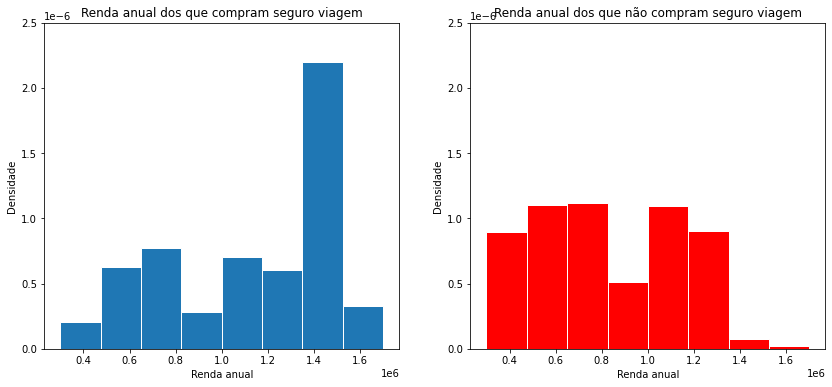

In [36]:
faixa= range(300000,1800000,175000)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.hist(dados.loc[dados['Seguro Viagem'] == 1]['Renda anual'],density=True,bins=faixa, edgecolor='white')
plt.ylim(0,2.5e-6)
plt.title('Renda anual dos que compram seguro viagem')
plt.ylabel('Densidade')
plt.xlabel('Renda anual')

plt.subplot(122)
plt.hist(dados.loc[dados['Seguro Viagem'] == 0]['Renda anual'],density=True,bins=faixa, edgecolor='white', color='r')
plt.ylim(0,2.5e-6)
plt.title('Renda anual dos que não compram seguro viagem')
plt.ylabel('Densidade')
plt.xlabel('Renda anual')

plt.show()

#### Conclusão:
<li>Podemos observar pelo gráfico, que até a faixa de 1.4 . 10⁶ não há uma oscilação considerável para o estudo, mas após essa faixa podemos notar que é evidente que quanto maior a renda, maior a probabilidade do viajante adquirir um seguro viagem.</li>

### Tamanho da Familía


In [38]:
dados.loc[dados['Seguro Viagem'] == 1]['Tamanho familia'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Tamanho familia,710.0,4.925352,1.678304,2.0,4.0,5.0,6.0,9.0


In [39]:
dados.loc[dados['Seguro Viagem'] == 0]['Tamanho familia'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Tamanho familia,1277.0,4.657009,1.562634,2.0,4.0,4.0,6.0,9.0


In [40]:
maximo=max(dados['Tamanho familia'])
minimo=min(dados['Tamanho familia'])
maximo,minimo

(9, 2)

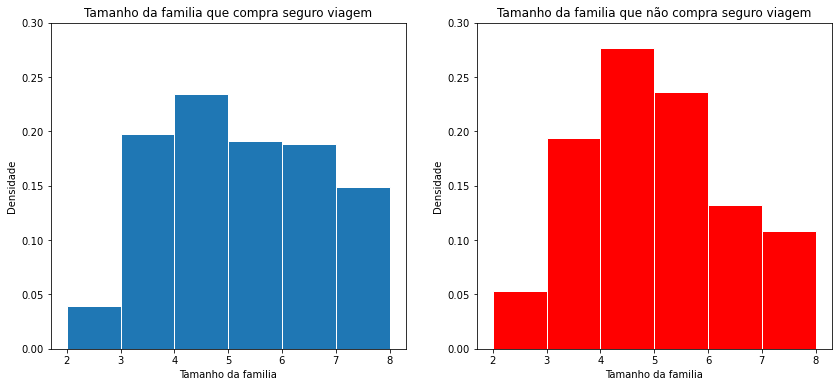

In [41]:
faixa= range(2,9,1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.hist(dados.loc[dados['Seguro Viagem'] == 1]['Tamanho familia'],density=True,bins=faixa, edgecolor='white')
plt.ylim(0,0.30)
plt.title('Tamanho da familia que compra seguro viagem')
plt.ylabel('Densidade')
plt.xlabel('Tamanho da familia')

plt.subplot(122)
plt.hist(dados.loc[dados['Seguro Viagem'] == 0]['Tamanho familia'],density=True,bins=faixa, edgecolor='white', color='r')
plt.ylim(0,0.30)
plt.title('Tamanho da familia que não compra seguro viagem')
plt.ylabel('Densidade')
plt.xlabel('Tamanho da familia')

plt.show()

#### Conclusão:
<li>Podemos concluir pelos gráficos que o tamanho da família não influencia significativamente na compra de seguro, mas é notável o descrecimento dos que não compram conforme a familía aumenta.</li>

### Doenças crônicas


In [43]:
doencas_x_seguro=pd.crosstab(dados['Doencas cronicas'], dados['Seguro Viagem'], margins=True, normalize=True)
round(doencas_x_seguro,2).transpose()

Doencas cronicas,0,1,All
Seguro Viagem,,,
0,0.47,0.17,0.64
1,0.25,0.10,0.36
All,0.72,0.28,1.00


<AxesSubplot:title={'center':'Não compradores vs Doenças crônicas'}, xlabel='Doencas cronicas', ylabel='count'>

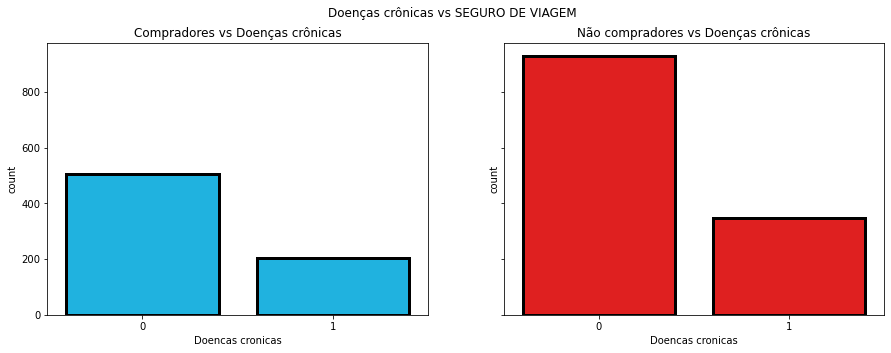

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].set_title('Compradores vs Doenças crônicas')
axes[1].set_title('Não compradores vs Doenças crônicas')
fig.suptitle('Doenças crônicas vs SEGURO DE VIAGEM')
sb.countplot(ax=axes[0] , data = dados.loc[dados['Seguro Viagem'] == 1], x="Doencas cronicas", palette=["#00C3FF","#00C3FF"], edgecolor="black", lw=3)
sb.countplot(ax=axes[1] ,data = dados.loc[dados['Seguro Viagem'] == 0], x="Doencas cronicas", palette=["#FF0000","#FF0000"], edgecolor="black", lw=3)


#### Conclusão:

<li>Analisando os dados, é possível perceber que para os viajantes que possuem doenças crônicas, há uma certa tendência de não adquirir o seguro viagem, tendo uma relação consideravelmente igual para aqueles que não possuem doença também.</li>

### Voos Frequentes

In [47]:
voos_x_seguro=pd.crosstab(dados['Voos frequentes'], dados['Seguro Viagem'], margins=True, normalize=True)
round(voos_x_seguro,2).transpose()

Voos frequentes,0,1,All
Seguro Viagem,,,
0,0.55,0.09,0.64
1,0.24,0.12,0.36
All,0.79,0.21,1.00


<AxesSubplot:title={'center':'Não compradores vs Voos frequentes'}, xlabel='Voos frequentes', ylabel='count'>

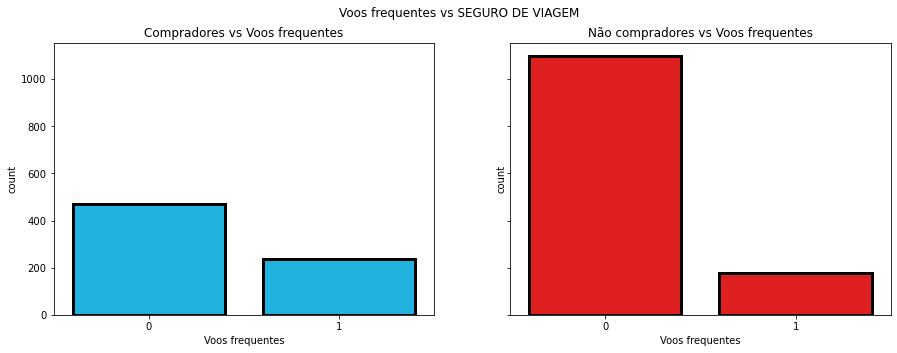

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].set_title('Compradores vs Voos frequentes')
axes[1].set_title('Não compradores vs Voos frequentes')
fig.suptitle('Voos frequentes vs SEGURO DE VIAGEM')
sb.countplot(ax=axes[0] , data = dados.loc[dados['Seguro Viagem'] == 1], x="Voos frequentes", palette=["#00C3FF","#00C3FF"], edgecolor="black", lw=3)
sb.countplot(ax=axes[1] ,data = dados.loc[dados['Seguro Viagem'] == 0], x="Voos frequentes", palette=["#FF0000","#FF0000"], edgecolor="black", lw=3)

### Viajou para o Exterior

In [49]:
exterior_x_seguro=pd.crosstab(dados['Viajou para exterior'], dados['Seguro Viagem'], margins=True, normalize=True)
round(exterior_x_seguro,2).transpose()

Viajou para exterior,0,1,All
Seguro Viagem,,,
0,0.60,0.04,0.64
1,0.21,0.15,0.36
All,0.81,0.19,1.00


<AxesSubplot:title={'center':'Não compradores vs Viagem para exterior'}, xlabel='Viajou para exterior', ylabel='count'>

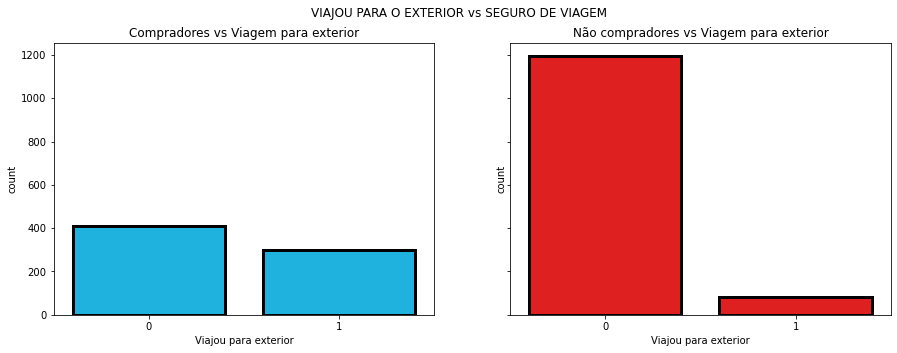

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].set_title('Compradores vs Viagem para exterior')
axes[1].set_title('Não compradores vs Viagem para exterior')
fig.suptitle('VIAJOU PARA O EXTERIOR vs SEGURO DE VIAGEM')
sb.countplot(ax=axes[0] , data = dados.loc[dados['Seguro Viagem'] == 1], x="Viajou para exterior", palette=["#00C3FF","#00C3FF"], edgecolor="black", lw=3)
sb.countplot(ax=axes[1] ,data = dados.loc[dados['Seguro Viagem'] == 0], x="Viajou para exterior", palette=["#FF0000","#FF0000"], edgecolor="black", lw=3)

#### Conclusão:
<p> </p>
<li>aaaa</li>

## Organizando o DataFrame para início das classificações
<hr style="border:0.5px solid black"> </hr>

### Retirando as colunas consideradas irrelevantes

In [53]:
dados_copy = pd.get_dummies(dados, prefix = ['Setor'], columns = ['Setor de emprego'])

dados_wo_tamanho = dados_copy.drop(columns = ['Idade', 'Tamanho familia'])
dados_wtamanho = dados_copy.drop(columns=['Idade'])

In [54]:
dados_feat = dados_wo_tamanho.drop(columns=['Seguro Viagem'])
target = dados_wo_tamanho['Seguro Viagem']
dados_feat

,Graduado,Renda anual,Doencas cronicas,Voos frequentes,Viajou para exterior,Setor_Government Sector,Setor_Private Sector/Self Employed
0,1,400000,1,0,0,1,0
1,1,1250000,0,0,0,0,1
2,1,500000,1,0,0,0,1
3,1,700000,1,0,0,0,1
4,1,700000,1,1,0,0,1
...,...,...,...,...,...,...,...
1982,1,1500000,0,1,1,0,1
1983,1,1750000,1,0,1,0,1
1984,1,1150000,1,0,0,0,1
1985,1,1000000,0,1,1,0,1


### Separando o DataFrame em treinamento e teste


In [55]:
dados_train, dados_test, target_train, target_test = train_test_split(dados_feat, target, test_size=0.4, random_state=42)

## Decision Tree


<center> <img src="arvore.jpeg" alt="arvore" width="500"/> </center>


O modelo "Decision Tree" possui esse nome uma vez que pode-se fazer uma analogia entre o método e uma árvore. Sendo assim, por meio da escolha de um atributo, esse que seria um dos "nós" da árvore, é seguido dois ramos um deles sendo se ele apresenta certo atributo ou não apresenta ele. A ordem em que os nós foram escolhidos representa o caminho que deve ser seguido com cada um deles separando em uma resposta de "sim" ou "não", com cada pergunta levando a próxima e guiando o caminho até atingir um resultado quando não há mais perguntas.

Como a Decision Tree funciona na prática:

Para explicar de maneira mais simples pegamos uma base de dados de um vídeo no youtube que seu link está na bibliografia. Essa base de dados consiste em prever se um funcionário possui um salário acima de cem mil dólares em função da sua formação, da empresa em que ele trabalha e da função que ele exerce dentro da empresa.

Pode-se ver o DataSet abaixo:
<center> <img src="data_set_video.png" alt="data_set" width="500"/> </center>

Para utilizar o método Decision Tree é necessário separar esse DataSet em dataframes menores a partir de um atributo definido de modo a analisar de maneira mais minuciosa e compreender melhor o comportamento da variável com intuito de ajudar na predição citada anteriormente.

<center> <img src="dataframes_video.png" alt="data_frames" width="1000"/> </center>


No caso da imagem acima foi escolhido a empresa em que o funcionário trabalha como atributo para separar o Data_Set. A partir desses dataframes é possível tirar conclusões como 100% dos funcionários que trabalham no facebook possuem um salário acima de cem mil dolares. E que 75% dos funcionários da ABC Pharma possuem um salário menor que cem mil dolares. Contudo, não é possível prever de uma maneira precisa os funcionários do Google uma vez que eles possuem uma entropia(comportamento aleatório) alta de 4 que recebem acima e 4 que recebem um salário menor que cem mil doláres.

Para obter mais informações outro atributo será escolhido para separar o dataframe do Google:

<center> <img src="dataframes_2.png" alt="data_2" width="1000"/> </center>


A partir desse novo dataframe é possível ter um maior entendimento dos funcionários que trabalham no Google de acordo com o atributo "função na empresa". Mostrando que 100% dos administradores de empresa recebem mais de cem mil dólares e que 100% dos executivos de renda recebem menos que cem mil dólares.

Repetindo o processo conseguimos obter ainda mais informações tendo uma Decision Tree com esse formato:

<center> <img src="decision.png" alt="decision" width="1000"/> </center>


A escolha dos atributos em diferentes ordens pode levar a casos em que se obtem mais informações e casos em que se obtém menos informações devido a entropia, desse modo é necessário escolher de forma adequada a ordem para evitar que impacte a predição. 

<img src="ordem.png" alt="ordem" width="1000"/> 


Desse modo, surge uma pergunta: Qual atributo devemos utilizar primeiro para separar o DataSet? Para responde-la é necessário entender como o método Gini funciona.

Gini Index:
<li>
        É importante ressaltar que quanto maior a entropia de um Dataframe maior será sua impureza, desse modo, quanto menor sua entropia maior será sua pureza. Desse modo, ele permite calcular a impureza dos Dataframes, com essa informação é so utilizar de primeiro atributo o que possui o menor Gini Index.</li>


O Gini Index utliza a formula matemática abaixo a fim de calcular a impureza do dataframe:

$$Gini Index = 1 - \sum_{i=1}^{n} (P{i})^2$$

Pondo o método em prática:
<img src="exemplo.png" alt="exemplo" width="300" /> 


A partir da imagem observada acima temos como P(>100k) e P(<100k) são iguais a quatro oitavos ou 0.5 cada.

Ao colocar essa probabilidades na formula conseguimos calcular sua impureza:

$$Gini Index = 1 - P(>100k)^2 - (<100k)^2$$

$$Gini Index = 1 - 0.5^2 - 0.5^2$$

$$Gini Index = 1 - 0.5^2 - 0.5^2$$

$$Gini Index = 0.5$$

In [62]:
modelo_dt = tree.DecisionTreeClassifier()
modelo_dt.fit(dados_train, target_train)

DecisionTreeClassifier()

In [63]:
modelo_dt.score(dados_test, target_test)

0.7811320754716982

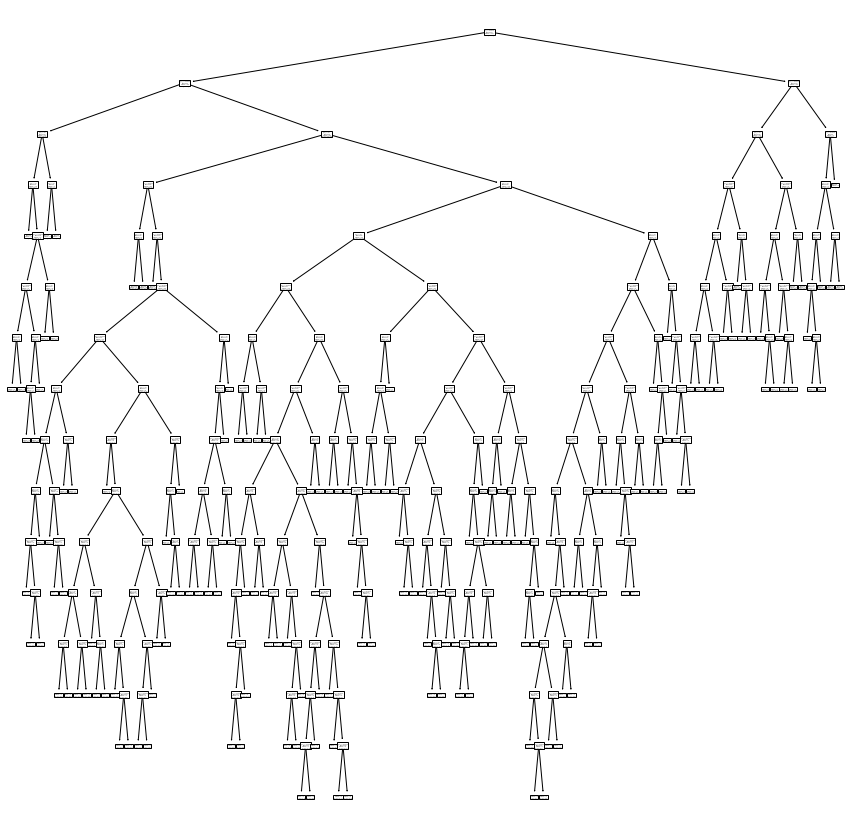

In [64]:
# dot_data = tree.export_graphviz(dados_test,target_test),
# class_names(y.unique(), filled=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(15,15))
tree.plot_tree(modelo_dt);

## Random Forest
<hr style="border:0.5px solid black"> </hr>

<center><img src="floresta.jpeg" alt="floresta" width="500"/> </center>


O método Random Forest é basicamente uma versão mais completa do Decision Tree. Uma vez que, ao invés de utilizar apenas uma árvore de decisão ele utiliza inúmeras árvores criadas por eles essas que não interajem ou impactam umas as outras, desse modo, as várias árvores de decisão são indepententes entre si. Sendo assim, podemos obter o resultado da probabilidade desejada ao fazer a média da soma de todas as árvores.


In [66]:
modelo_rf = RandomForestClassifier(n_estimators=20)
modelo_rf.fit(dados_train, target_train)

RandomForestClassifier(n_estimators=20)

In [67]:
modelo_rf.score(dados_test, target_test)


0.7685534591194969

In [68]:
target_predict = modelo_rf.predict(dados_test)
accuracy_score(target_test, target_predict)

0.7685534591194969

Text(69.0, 0.5, 'Truth')

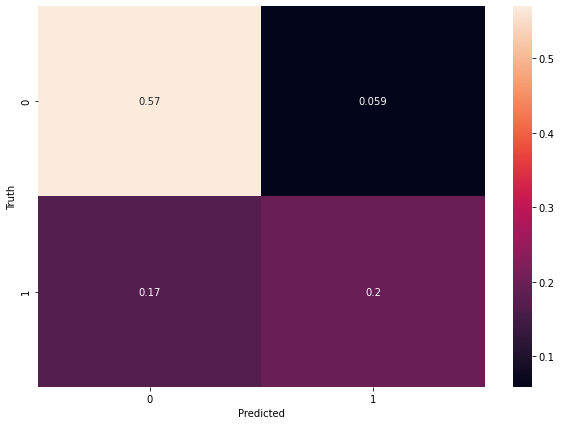

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, target_predict,normalize='all')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Análise da matriz de confusão
<hr style="border:0.5px solid black"> </hr>

KeyError: 1

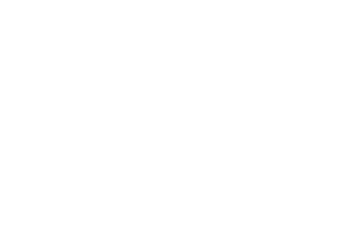

In [70]:
modelo_dt = tree.DecisionTreeClassifier()
var = modelo_dt.fit(dados_train, target_train)
fn = dados_feat
cn = target

#fig, axes = plt.subplots(nrows = 1,ncols = 7,figsize = (10,2), dpi=3000)

for index in range(0, 7):
    tree.plot_tree(var,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True);
                   #ax = axes[index]);



#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#     print("erro")
# fig.savefig('rf_5trees.png')

In [71]:
dados_wo_tamanho.head()

,Graduado,Renda anual,Doencas cronicas,Voos frequentes,Viajou para exterior,Seguro Viagem,Setor_Government Sector,Setor_Private Sector/Self Employed
0,1,400000,1,0,0,0,1,0
1,1,1250000,0,0,0,0,0,1
2,1,500000,1,0,0,1,0,1
3,1,700000,1,0,0,0,0,1
4,1,700000,1,1,0,0,0,1


Média dos scores das 100 simulações realizadas: 0.6984154929577464


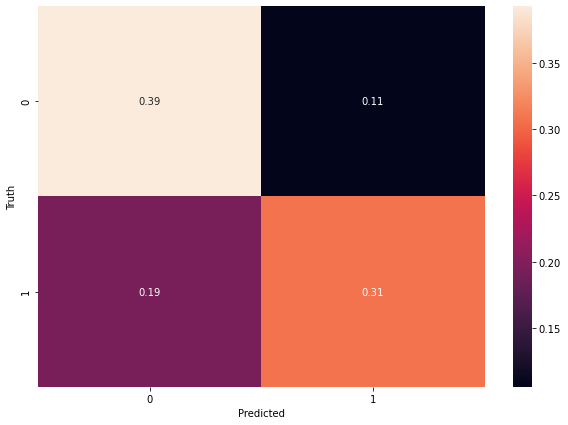

In [72]:
seguro_0 = dados_wo_tamanho.copy()
seguro_1 = dados_wo_tamanho.copy()

seguro_0 = seguro_0.loc[dados_wo_tamanho['Seguro Viagem'] == 0]
seguro_1 = seguro_1.loc[dados_wo_tamanho['Seguro Viagem'] == 1]

lista = []
amostra = range(0,100)

for j in amostra:

    # Gerando números aleatórios para selecionar na base stroke_0
    x = np.random.randint(0, seguro_0.shape[0], seguro_1.shape[0])

    # Gerando o novo DataFrame com a mesma quantidade da base stroke_1
    seguro_0_novo = seguro_0.iloc[x,:]

    # Juntando os DataFrames novamente
    seguro_novo = pd.concat([seguro_0_novo, seguro_1])
    
    # Redefinindo nosso Target e suas Features
    feat = seguro_novo.drop('Seguro Viagem', axis='columns')
    target = seguro_novo['Seguro Viagem']
    
    # Separando nossa base de dados em treinamento e teste
    feat_train,feat_test,target_train,target_test = train_test_split(feat, target, test_size=0.4,random_state=42)
    
    # Gerando o modelo Random Forest
    modelo_rf =RandomForestClassifier(n_estimators=20)
    
    # Treinando o modelo
    modelo_rf.fit(feat_train, target_train)
    
    # Adcionando o score do modelo em uma lista
    lista.append(modelo_rf.score(feat_test, target_test))
    
    # Predição do target
    target_predict = modelo_rf.predict(feat_test)



cm = confusion_matrix(target_test, target_predict, normalize='all')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


lista = pd.Series(lista)
print(f"Média dos scores das 100 simulações realizadas: {lista.mean()}")

# Bibliografia:
<ul>
    <li> https://www.youtube.com/watch?v=PHxYNGo8NcI&t=275s</li>
    <li>https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8</li>
    <li>https://cnvrg.io/random-forest-regression/?gclid=Cj0KCQiAtJeNBhCVARIsANJUJ2GZKPaKlSfUdlfUFPJDRPgDmLkOF2Mj6k23ffWFoPAEgAPRfvAmnH0aAg0HEALw_wcB</li>
</ul>


# O que cada um fez:

Pedro Paulo Moreno Camargo:
<li>Estilização do Dataframe e construção da parte teórica do Decision Tree e Random Forest.</li>